In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Q1) Write an RK4 integrator with prototype to take one step. Use $\frac{dy}{dx} = \frac{y}{1+x^2}$, from $x=-20$ to $x=20$, with $y(-20)=1$ using $200$ steps.

In [2]:
def rk4_step(fun,x,y,h):
    k1=fun(x,y)
    k2=fun(x+h/2,y+h*k1/2)
    k3=fun(x+h/2,y+h*k2/2)
    k4=fun(x+h,y+h*k3)
    dy=h*(k1+2*k2+2*k3+k4)/6
    return y+dy
    
def func(x,y):
    dydx=y/(1+x**2)
    return dydx

In [13]:
# Now define linspace and integrate for 200 steps

npt = 201
xx = np.linspace(-20, 20, npt)
h = (xx[1]-xx[0]) # step size
yy = np.zeros(npt)
y0 = 1 # initial condition
yy[0] = y0

for i in range(npt-1): # iterate over all points after initial point, integrating
    yy[i+1] = rk4_step(func,xx[i],yy[i],h)

#fig, ax = plt.subplots(figsize=[14, 8])
integral = h*np.sum(yy)
print(integral)
print(yy)

396.56927181204424
[ 1.          1.00050391  1.00101833  1.00154361  1.00208008  1.00262811
  1.00318808  1.00376039  1.00434543  1.00494365  1.00555548  1.00618141
  1.00682193  1.00747754  1.00814879  1.00883624  1.00954049  1.01026215
  1.01100189  1.01176039  1.01253837  1.01333659  1.01415584  1.01499697
  1.01586088  1.01674848  1.01766077  1.01859879  1.01956365  1.0205565
  1.02157859  1.02263122  1.02371578  1.02483374  1.02598666  1.02717621
  1.02840416  1.02967238  1.0309829   1.03233785  1.03373953  1.03519039
  1.03669306  1.03825035  1.0398653   1.04154115  1.0432814   1.04508983
  1.0469705   1.04892781  1.05096654  1.05309185  1.05530935  1.05762514
  1.06004589  1.06257884  1.06523197  1.06801397  1.07093443  1.07400388
  1.07723395  1.08063752  1.08422885  1.08802383  1.09204013  1.09629757
  1.10081836  1.10562748  1.1107532   1.11622754  1.12208693  1.12837305
  1.13513372  1.14242412  1.15030819  1.15886047  1.16816834  1.17833484
  1.18948235  1.20175717  1.21533

Now write another stepper that takes a step of length $h$, compares that to two steps of $h/2$, and uses them to cancel out the leading-order error term from RK4. How many function evaluations per step does this one use? Use this modified stepper to carry out the same ODE solution using the $\textit{same number of function evaluations}$ as the original. Which is more accurate?

In [22]:
def rk4_stepd(fun,x,y,h):
    # one full step
    fstep = rk4_step(fun, x, y, h)
    # two half-steps
    hstep1 = rk4_step(fun, x, y, h/2)
    hstep2 = rk4_step(fun, x, hstep1, h/2)
    return hstep1+hstep2 +(hstep1+hstep2-fstep)/15

In [23]:
npt = 201
xx = np.linspace(-20, 20, npt)
h = (xx[1]-xx[0]) # step size
yy = np.zeros(npt)
y0 = 1 # initial condition
yy[0] = y0

for i in range(npt-1): # iterate over all points after initial point, integrating
    yy[i+1] = rk4_stepd(func,xx[i],yy[i],h)
    
print(yy)

[1.00000000e+00 2.06743525e+00 4.27432076e+00 8.83701686e+00
 1.82703868e+01 3.77740362e+01 7.80985103e+01 1.61471520e+02
 3.33851298e+02 6.90262504e+02 1.42718316e+03 2.95086605e+03
 6.10131971e+03 1.26154494e+04 2.60847386e+04 5.39355658e+04
 1.11524209e+05 2.30604838e+05 4.76840595e+05 9.86015573e+05
 2.03892048e+06 4.21621730e+06 8.71870745e+06 1.80296748e+07
 3.72846964e+07 7.71046435e+07 1.59454929e+08 3.29763940e+08
 6.81987632e+08 1.41045194e+09 2.91708382e+09 6.03321387e+09
 1.24783779e+10 2.58093799e+10 5.33835539e+10 1.10420154e+11
 2.28402406e+11 4.72459951e+11 9.77331509e+11 2.02177110e+12
 4.18249953e+12 8.65275378e+12 1.79014438e+13 3.70371734e+13
 7.66310044e+13 1.58558314e+14 3.28089484e+14 6.78915057e+14
 1.40494568e+15 2.90754069e+15 6.01749240e+15 1.24546117e+16
 2.57793080e+16 5.33630187e+16 1.10468737e+17 2.28702126e+17
 4.73516319e+17 9.80473701e+17 2.03037250e+18 4.20491325e+18
 8.70929370e+18 1.80408397e+19 3.73750815e+19 7.74396175e+19
 1.60473895e+20 3.325911

# Q2a) Write a program to solve for the decay of products of U238 (see slides). You can use the ODE solver from scipy, but need to set up problem properly. Include all decay products in the chain. Assume you start from a sample of pure U238. What solver would you use for this problem?

The $i^{th}$ nuclide's decay may be written as $\frac{dN_i}{dt} = \lambda_{i-1} N_{i-1} - \lambda_i N_i$, whilst the $0^{th}$ is $\frac{dN_0}{dt} = -\lambda_0 N_0$, and the last decay is simply $\frac{dN_{n-1}}{dt} = \lambda_{n-1} N_{n-1}$, given the first decay has no preceding nuclide and the last decay results in a stable nuclide. Taking $\lambda = \tau^{-1}$ for $\tau$ being the the mean lifetime of the nuclide we can compute its half-life as $t_{1/2} = \frac{\text{ln}(2)}{\lambda}$, and hence replace $\lambda_i$ with $\frac{\text{ln}(2)}{t_{1/2, i}}$ in the previously stated equations.

In [27]:
from scipy import integrate

In [68]:
# Make list with half-lives of different nuclides (in years)

half_lives = [4.468e9, 24.10/365, 6.70/ 24 /365, 245500, 75380, 1600, 38235/365, 3.10/60/24/365, 26.8/60/24/365,
             19.9/60/24/365, 164.3*1e-6 /60/60/24/365, 22.3, 5015, 138.376/365]

# Define function for the decay of a multiple nuclides

def decay(t, N, half_life=half_lives):

    dNdt = np.zeros(len(half_life)+1)
    A = np.log(2) # constant for half-life
    
    for i in range(len(dNdt)): # iterate through nuclide decays
        if i == 0:
            dNdt[0] = -A*N[0]/half_life[0] # first decay
        elif i == (len(half_life)):
            dNdt[-1] = A*N[-2]/half_life[-2] # last decay
        else:
            dNdt[i] = A*(N[i-1]/half_life[i-1] - N[i]/half_life[i])
    return dNdt

Now that we have defined our decay process and calculated the half-lives from the slides in class in terms of Earth-years, we can numerically integrate using scipy integration. Given the question states we start with pure U238, we set this initial value to 1 and leave all other nuclides as 0. To choose the type of solver, we consider what we saw in class where the RK4 algorithm was very slow and required several orders of magnitude larger evaluations compared to the Radau method. Therefore, we will use the Radau method here, and integrate over a time interval of comparable magnitude to the half-life of U238, as if we set this interval to be several orders of magnitude smaller, there will be no evolution of the system as the first nuclide in the chain will not have decayed. In this instance, we will conservatively choose $10^{10}$, although it is likely that any interval around $\approx 10^7$ would be sufficient to see some reasonable change in the initial nuclide change (and subsequent nuclides in the chain).

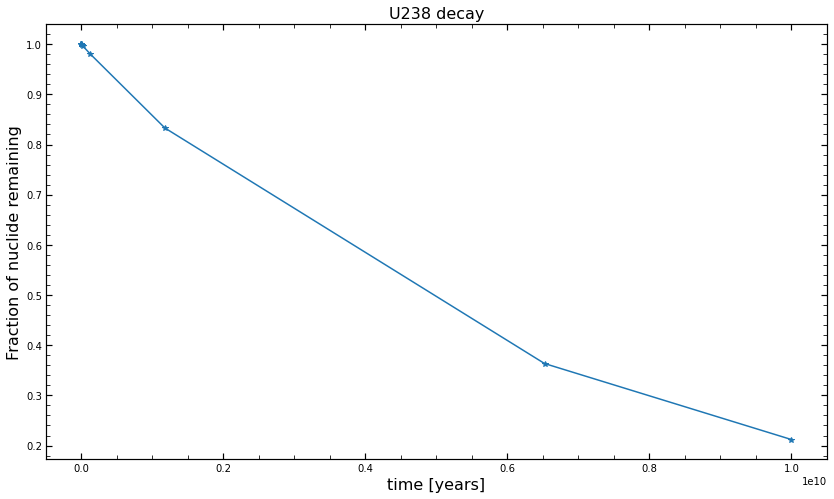

In [102]:
# Define the starting point, where we have pure U238, set to 1 for simplicity

zeros = np.zeros(len(half_lives)+1)
zeros[0] = 1
N0 = zeros
t0,t1 = 0, 1e10 # time interval bounds

ans_stiff = integrate.solve_ivp(decay,[t0, t1], N0, method='Radau')
fig, ax = plt.subplots(figsize=[14, 8])
ax.plot(ans_stiff.t, ans_stiff.y[0,:], '*-')
ax.set_ylabel('Fraction of nuclide remaining', fontsize=16)
ax.set_xlabel('time [years]', fontsize=16)
ax.set_title('U238 decay', fontsize=16);

# Q2b) Plot the ratio of Pb206 to U238 as a function of time over a region where it's interesting. Does this make sense analytically? (All half-lives are short compared to U238, so you can approximate the U238 decaying instantly to lead). Now plot the ratio of Thorium 230 to U234 over a region where that is interesting. 

Pb206 is the last element in the chain, and therefore we can compute the ratio of Pb206 to U238 by dividing the last element by the first element as a function of time (which we have already computed above).

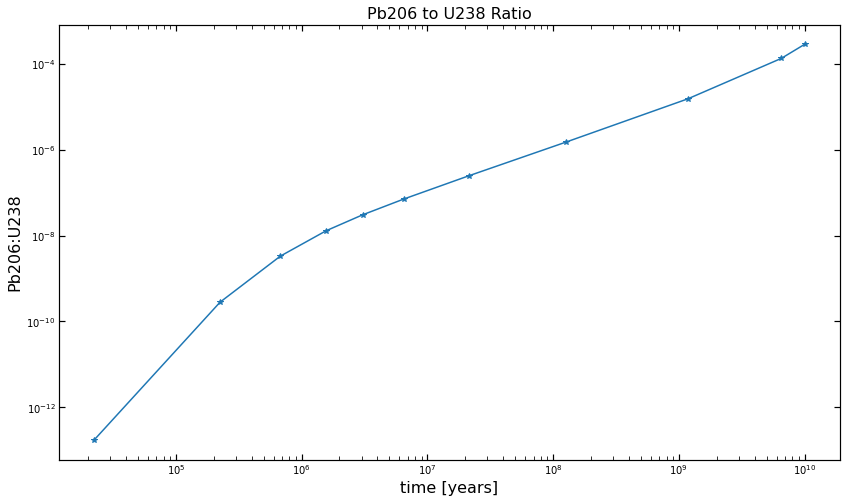

In [112]:
Pb206 = ans_stiff.y[-1,:]
U238 = ans_stiff.y[0,:]

fig, ax = plt.subplots(figsize=[14, 8])
ax.plot(ans_stiff.t[5:], (Pb206/U238)[5:], '*-')
ax.set_ylabel('Pb206:U238', fontsize=16)
ax.set_xlabel('time [years]', fontsize=16)
ax.set_title('Pb206 to U238 Ratio', fontsize=16)
ax.set_yscale('log')
ax.set_xscale('log');

We see the progressive increase in the ratio with time as more Pb206 is formed and more U238 decays. Over an interval of $\approx 1$ billion years, the ratio jumps from $\approx 10^{-12}$ to $\approx 10^{-4}$.

<ipython-input-115-901844d9f150>:5: RuntimeWarning: invalid value encountered in true_divide
  ax.plot(ans_stiff.t[:8], (Th230/U234)[:8], '*-')


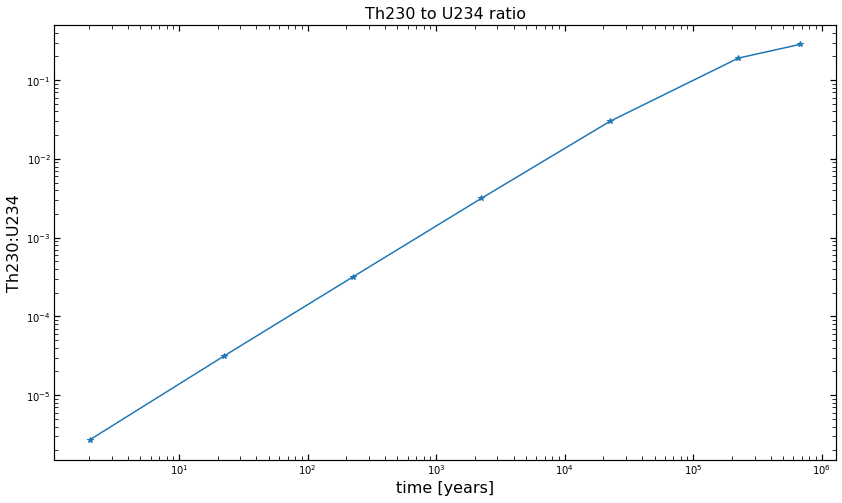

In [115]:
Th230 = ans_stiff.y[4,:]
U234 = ans_stiff.y[3,:]

fig, ax = plt.subplots(figsize=[14, 8])
ax.plot(ans_stiff.t[:8], (Th230/U234)[:8], '*-')
ax.set_ylabel('Th230:U234', fontsize=16)
ax.set_xlabel('time [years]', fontsize=16)
ax.set_title('Th230 to U234 ratio', fontsize=16)
ax.set_yscale('log')
ax.set_xscale('log');

In this instance, the ratio evolves over a much smaller timescale and earlier on given the two nuclides are further up in the chain than Pb206. Over a period of $\approx 10^5$ years, the ratio increases from $10^{-6} \rightarrow 10^{-1}$.

# Q3a) Look at file dish_zenith.txt, containing data for prototype telescope dish. The end result is that dish_zenith.txt contains the (x,y,z) positions in mm of a few hundred targets placed on the dish. The ideal telescope dish should be a rotationally symmetric paraboloid. We will try to measure the shape of the paraboloid, and see how well we did. For the dish pointing in the z-direction, we have a rotationally symmetric paraboloid, $z - z_0 = a((x-x_0)^2 + (y-y_0)^2$ where we need to solve for $x_0, y_0, x_0, a$. Show that we can pick a set of new parameters that make the problem linear. What are these new parameters and how to they relate to the old ones?

In [127]:
data=np.loadtxt('dish_zenith.txt')
x, y, z = data.T
print(x)

[ 1.426057e+03  1.282076e+03  1.098741e+03  1.247659e+03  1.067255e+03
  1.065281e+03  9.496440e+02  1.064484e+03  1.464422e+03  1.116177e+03
  2.190252e+03  2.077323e+03  1.963414e+03  1.842735e+03  1.713418e+03
  1.581005e+03  1.446929e+03  1.311348e+03  1.175578e+03  1.215348e+03
  1.027516e+03  1.562301e+03  1.401601e+03  1.248649e+03  1.392732e+03
  2.053558e+03  2.053387e+03  1.895343e+03  1.728303e+03  1.566694e+03
  6.991020e+02  8.378070e+02  5.034500e+02  7.506700e+02  7.981380e+02
  6.419550e+02  1.270599e+03  8.769080e+02  1.651061e+03  2.123733e+03
  1.220383e+03  1.567095e+03  2.039038e+03  1.156701e+03  2.520392e+03
  1.489110e+03  1.935604e+03  1.096135e+03  2.392049e+03  2.786916e+03
  1.403825e+03  1.826319e+03  1.024650e+03  2.682530e+03  1.315239e+03
  1.718121e+03  9.535310e+02  2.115755e+03  2.536131e+03  1.228466e+03
  2.399086e+03  1.980497e+03  8.726900e+02  1.139684e+03  8.034090e+02
  1.045913e+03  1.359487e+03  2.106602e+03  1.700409e+03  2.456276e+03
  2.30

In [131]:
A = np.zeros((len(data),6))

A[:,0] = x**2
A[:,1] = y**2
A[:,2] = -2*x
A[:,3] = -2*y
A[:,4] = -z
A[:,5] = 1

m = np.linalg.inv(A.T@A)@A.T@data
#for i in range(len(data)):
#    A[:,0] = x[i]**2
#    A[:,1] = y[i]**2
#    A[:,2] = -2*x[i]
#    A[:,3] = -2*y[i]
#    A[:,4] = -z[i]
#    A[:,5] = 1
#print(A)

In [132]:
print(m)

[[-1.09981468e-15  1.02012582e-14 -2.10508694e-15]
 [-1.02175213e-15  1.02546010e-14  1.55040911e-16]
 [-5.00000000e-01 -1.24344979e-14  1.41206491e-15]
 [-6.36157793e-14 -5.00000000e-01 -1.61204383e-13]
 [-6.32383035e-12  6.18349816e-11 -1.00000000e+00]
 [ 8.64383765e-09 -9.44492058e-08  6.09361450e-10]]


In [125]:
print(A)

[[ 2.03363857e+06  1.96852830e+05 -2.85211400e+03  8.87362000e+02
   1.13364900e+03  1.00000000e+00]
 [ 1.64371887e+06  2.62890553e+04 -2.56415200e+03  3.24278000e+02
   1.23222100e+03  1.00000000e+00]
 [ 1.20723179e+06  5.66888526e+03 -2.19748200e+03 -1.50584000e+02
   1.31379200e+03  1.00000000e+00]
 ...
 [ 5.87154388e+03  1.44610245e+04  1.53252000e+02 -2.40508000e+02
   1.51082100e+03  1.00000000e+00]
 [ 9.34431556e+03  2.95729316e+03  1.93332000e+02 -1.08762000e+02
   1.51114900e+03  1.00000000e+00]
 [ 3.24000000e-04  2.14183225e+04 -3.60000000e-02 -2.92700000e+02
   1.51178700e+03  1.00000000e+00]]
